# Lecture 10

-Introduction: [>>](#Introduction)  
-Numerical solution of equations: [>>](#Numerical-solution-of-equations)  
--Graphical approach: [>>](#Graphical-approach)  
--Solving equation using Numpy: [>>](#Solving-equation-using-Numpy)  
-Image analysis with Numpy: [>>](#Image-analysis-with-Numpy)  

## Introduction

Computer programs written in languages like Fortran, C and Java are compiled before they are run. This means the original source code is converted into an executable file. The program is actually run in a separate step, using the executable file.  In contrast,  Python code is interpreted statement by statement at the time that the program is run. The two approaches have their advantages and disadvantages. The advantage of the separate compilation step is that, as the entire program is compiled in one go, it can be optimised to ensure that it uses the computer's memory and processors as efficiently as possible. The disadvantage is that the development process takes more time. If you change anything, you have to compile the entire program again before you can run it and test it. This is one of the reasons that developing programs using Python is usually considerably quicker than working in C, Fortran or Java. The downside is that Python programs are usually slower. For many applications, this isn't a problem, but in some scientific analyses, for example involving large datasets, it can cause difficulties. This is where Numpy can be very useful. It allows programs to be written using Python, but the underlying Numpy code has been written in C and compiled, allowing execution at high speed. Learning to use Numpy effectively is therefore a useful skill for scientific programmers.

This week we will look at an example of how Numpy arrays can be used to solve equations numerically, and then illustrate how the same technique can be used to do some image processing. The idea is not so much that the techniques used here are the best there are for solving equations or edge-finding in images, but that they show how Numpy functions can often be used as alternatives to Python control structures in scientific programming. 

## Numerical solution of equations

### Graphical approach

Suppose we have a function $y(x)$ and we want to know the values of $x$ where it crosses a threshold value $T$, i.e. we want to solve the equation $y(x) = T$. We could do this using a graph:

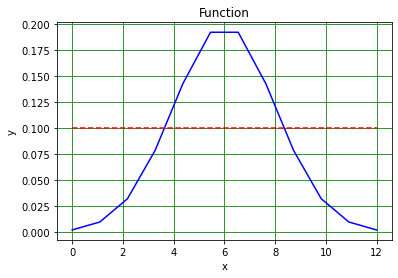

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
def gaussFunc(mu, sigma, x):
    g = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x - mu)**2/(2*sigma**2))
    return g
#
mu = 6.0
sigma = 2.0
#
thresh = 0.1
#
xMin = 0.0
xMax = 12.0
nPoints = 12
xArr = np.linspace(xMin, xMax, nPoints)
#
yArr = gaussFunc(mu, sigma, xArr)
#
plt.figure(figsize = (6, 4))
plt.title("Function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xArr, yArr, color = 'b', linestyle = '-')
plt.plot(xArr, thresh*np.ones(nPoints), color = 'r', linestyle = '--')
plt.grid(color = 'g')
plt.show()

The solutions of the equation $y(x) = T$ are where the curve crosses the line, i.e. at about $y = 3.5$ and about $y = 8.5$. Better precision can be obtained by increasing the number of points at which the function is evaluated and plotted.

### Solving equation using Numpy
As an alternative to the graphical solution, we could also manipulate the Numpy array that contains the values of the function in the following way.

The first step is to make a logical (or boolean) array that is `True` where the function is above the threshold `thresh` and `False` otherwise. 

In [2]:
LyArr = yArr > thresh
print("LyArr\n",LyArr)

LyArr
 [False False False False  True  True  True  True False False False False]


<!-- Student -->
We then make another version of the logical array in which all the elements are shifted to the left (along the $x$ axis).

In [3]:
LyArrXL = np.zeros(nPoints).astype(bool)
shiftX = 1
LyArrXL[0:nPoints - shiftX] = LyArr[shiftX:nPoints]
print("LyArr\n",LyArr)
print("LyArrXL\n",LyArrXL)

LyArr
 [False False False False  True  True  True  True False False False False]
LyArrXL
 [False False False  True  True  True  True False False False False False]


<!-- Student -->
Now we take the logical `not` of the first array. 

In [4]:
LyArrNot = np.logical_not(LyArr)
print("LyArr\n",LyArr)
print("LyArrNot\n",LyArrNot)

LyArr
 [False False False False  True  True  True  True False False False False]
LyArrNot
 [ True  True  True  True False False False False  True  True  True  True]


<!-- Student -->
Taking the logical `and` of `LyArrXL` and `LyArrNot`, we can determine the left-hand position in the array which corresponds to the place where the function crosses the threshold, as below.

In [5]:
boolThrL = np.logical_and(LyArrNot, LyArrXL)
print("LyArrXL\n",LyArrXL)
print("LyArrNot\n",LyArrNot)
print("boolThrL\n",boolThrL)

LyArrXL
 [False False False  True  True  True  True False False False False False]
LyArrNot
 [ True  True  True  True False False False False  True  True  True  True]
boolThrL
 [False False False  True False False False False False False False False]


This process is illustrated below:

![](Lect10-Left-Edge.png "Finding left-hand solution")

<!-- Student -->
We can now get the left-hand $x$ value at which the function crosses the threshold using a further feature of Numpy arrays: if we use a set of logical values as the indices of an array, the values that are returned are those with index `True`. This is shown below.

In [6]:
xThrL = xArr[boolThrL]
np.set_printoptions(precision = 2)
print("xThrL",xThrL)

xThrL [3.27]


As in the case of the graphical solution, the precision is determined by the size of the arrays (i.e. `nPoints`).

One way of finding the right-hand $x$ value at which the function crosses the threshold is to repeat the above, but shifting the elements of the logical array to the right instead of the left:

In [7]:
LyArrXR = np.zeros(nPoints).astype(bool)
LyArrXR[shiftX:nPoints] = LyArr[0:nPoints - shiftX]
print("LyArr\n",LyArr)
print("LyArrXR\n",LyArrXR)
print("LyArrNot\n",LyArrNot)
#
boolThrR = np.logical_and(LyArrNot, LyArrXR)
print("boolThrR\n",boolThrR)
#
xThrR = xArr[boolThrR]
print("xThrR",xThrR)

LyArr
 [False False False False  True  True  True  True False False False False]
LyArrXR
 [False False False False False  True  True  True  True False False False]
LyArrNot
 [ True  True  True  True False False False False  True  True  True  True]
boolThrR
 [False False False False False False False False  True False False False]
xThrR [8.73]


Again, we can make a picture of this process:

![](Lect10-Right-Edge.png "Finding right-hand solution")

Let's plot the positions of these two solutions:

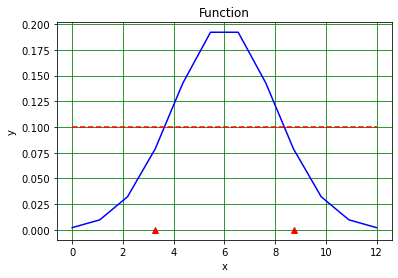

In [8]:
plt.figure(figsize = (6, 4))
plt.title("Function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xArr, yArr, color = 'b', linestyle = '-')
plt.plot(xArr, thresh*np.ones(nPoints), color = 'r', linestyle = '--')
plt.plot(xThrL, np.zeros(len(xThrL)), color = 'r', linestyle = '', marker = '^')
plt.plot(xThrR, np.zeros(len(xThrR)), color = 'r', linestyle = '', marker = '^')
plt.grid(color = 'g')
plt.show()

Repeating the above with larger arrays gives improved precision.

 
Left-hand solution [3.63], right-hand solution [8.37].
 


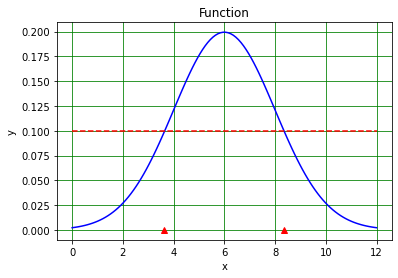

In [9]:
#
# Set x range
xMin = 0.0
xMax = 12.0
nPoints = 120
xArr = np.linspace(xMin, xMax, nPoints)
#
# Define curve values
yArr = gaussFunc(mu, sigma, xArr)
#
# Find left solution
LyArr = yArr > thresh
LyArrXL = np.zeros(nPoints).astype(bool)
shiftX = 1
LyArrXL[0:nPoints - shiftX] = LyArr[shiftX:nPoints]
LyArrNot = np.logical_not(LyArr)
boolThrL = np.logical_and(LyArrNot, LyArrXL)
xThrL = xArr[boolThrL]
#
# Find right solution
LyArrXR = np.zeros(nPoints).astype(bool)
LyArrXR[shiftX:nPoints] = LyArr[0:nPoints - shiftX]
boolThrR = np.logical_and(LyArrNot, LyArrXR)
xThrR = xArr[boolThrR]
print(" ")
print(f"Left-hand solution {xThrL}, right-hand solution {xThrR}.")
print(" ")
#
plt.figure(figsize = (6, 4))
plt.title("Function")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xArr, yArr, color = 'b', linestyle = '-')
plt.plot(xArr, thresh*np.ones(nPoints), color = 'r', linestyle = '--')
plt.plot(xThrL, np.zeros(len(xThrL)), color = 'r', linestyle = '', marker = '^')
plt.plot(xThrR, np.zeros(len(xThrR)), color = 'r', linestyle = '', marker = '^')
plt.grid(color = 'g')
plt.show()

## Image analysis with Numpy

Numpy can also be used to analyse images. The example below shows how a picture of a squirrel can be read into Numpy and then manipulated so that only pixels above a certain threshold are displayed.

As an aside, if you want to manipluate images using Python, the `scipy.ndimage` package provides a large range of image analysis software; see [here](https://docs.scipy.org/doc/scipy/reference/ndimage.html) for more information!

Date and time  2021-01-06 21:08:12.359851
RGB image
Number of rows 994 of columns 976 of pixels 970144 and depth 3
RGB min and max pixel values: 0 255
Greyscale min and max pixel values: 4 247
 


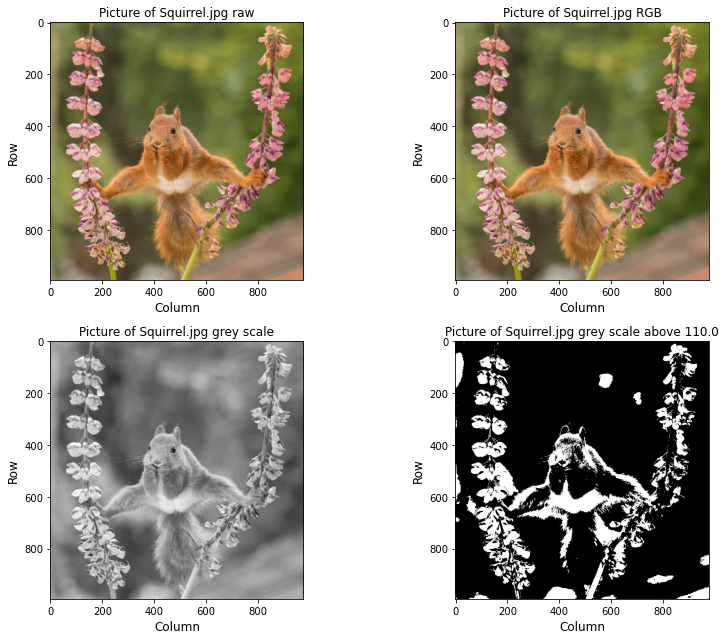

 
Date and time 2021-01-06 21:08:13.241657
Time since last check is 0:00:00.881806


In [10]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import numpy as np
import scipy.ndimage as scimg
import matplotlib.pyplot as plt
%matplotlib inline
#
def rgba2rgb(rgba, background = (255, 255, 255)):
    '''
    Function to convert RGBA images into RGB format. Input RGBA image (and background); output RGB image
    '''
    rows, cols, chans = rgba.shape
    #
    debug = False
    #
    if debug:
        if chans == 4:
            print("RGBA image")
        elif chans == 3:
            print("RGB image")
            return rgba
        else:
            print("Channel number is",chans)
            sys.exit()
    else:
        assert chans == 4, 'RGBA image must have 4 channels.'
    #
    rgb = np.zeros((rows, cols, 3), dtype = 'float32')
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]
    #
    a = np.asarray(a, dtype='float32')/255.0
    #
    R, G, B = background
    #
    rgb[:, :, 0] = r*a + (1.0 - a)*R
    rgb[:, :, 1] = g*a + (1.0 - a)*G
    rgb[:, :, 2] = b*a + (1.0 - a)*B
    #
    return np.asarray(rgb, dtype = np.uint8)
#
def rgb2grey(rgb, negative = 0):
    '''
    Convert RGB image to greyscale. Input RGB, output greyscale image.
    '''
    rows, cols, chans = rgb.shape
    #
    debug = True
    #
    if debug:
        if chans == 4:
            print("RGBA image")
        elif chans == 3:
            print("RGB image")
        elif chans == 1:
            print("Greyscale image")
            return rgb
        else:
            print("Channel number is",chans)
            sys.exit()
    else:
        assert chans == 3, 'RGB image must have 3 channels.'
    #
    grey = np.zeros((rows, cols), dtype = 'float32')
    #
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    #
    grey[:, :] = (0.2125*(r*negative + (negative - 1.0)*r) + 
                  0.7154*(g*negative + (negative - 1.0)*g) + 
                  0.0721*(b*negative + (negative - 1.0)*b))
    #
    return np.asarray(grey, dtype = np.uint8)
#
# Read in image
#imFile = "Telescope.bmp"
#imFile = "Shark.jpg"
imFile = "Squirrel.jpg"
#imFile = "Irradiated01.bmp"
#
imgRaw = plt.imread(imFile)
nRows = imgRaw.shape[0] # row corresponds to pixel's y coordinate
nCols = imgRaw.shape[1] # col corresponds to pixel's x ccordinate
nDepth = imgRaw.shape[2] # depth == 3 for red, blue green (RBG), == 4 for RBGA (A is alpha, i.e. transparency) 
img = np.zeros((nRows, nCols))
#
if nDepth == 4:
    imgRGB = rgba2rgb(imgRaw)
    img = rgb2grey(imgRGB)
elif nDepth == 3:
    imgRGB = imgRaw
    img = rgb2grey(imgRGB)
elif nDepth == 1:
    imgRGB = imgRaw
    img = imgRaw
else:
    print(" ")
    print("Unexpected image depth",nDepth)
    sys.stop()
#
print("Number of rows",nRows,"of columns",nCols,"of pixels",nRows*nCols,"and depth",nDepth)
print("RGB min and max pixel values:",np.amin(imgRGB), np.amax(imgRGB))
print("Greyscale min and max pixel values:",np.amin(img), np.amax(img))

#print("RGB\n",imgRGB)
#print("img\n",img)
#
# Set threshold for finding edges, thresh ~ 98 for shark, thresh ~ 10 for telescope, thresh ~ 110 for squirrel
thresh = 110.0
#thresh = 98.0
imgThr = np.zeros((nRows, nCols))
imgThr = img > thresh
#
print(" ")
fig = plt.figure(figsize=(12, 9))
fig.add_subplot(2, 2, 1)
plt.title("Picture of " + imFile + " raw")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgRaw)
#
fig.add_subplot(2, 2, 2)
plt.title("Picture of " + imFile + " RGB")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgRGB)
#
fig.add_subplot(2, 2, 3)
plt.title("Picture of " + imFile + " grey scale")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(img, cmap = "Greys")
#
fig.add_subplot(2, 2, 4)
plt.title("Picture of " + imFile + " grey scale above " + str(thresh))
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgThr, cmap = "Greys")
#
fig.tight_layout()
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

<!-- Student -->

This "thresholded" image is a two-dimensional equivalent of the one-dimensional region of the gaussian which is greater that the threshold value above. We can therefore use a two-dimensional version of our "shift left and right" algorithm to find where the threshold is crossed, which will give us the edges of the thresholded figure. Working in 2D means we have to both shift left and right and shift up and down, as is illustrated below:

![](Lect10-Left-Right-Edge.png "Finding left and right edges")

The code to do this follows:

Date and time 2021-01-06 21:08:53.959486
Min intensity in image 4 max intensity 247
nRows 994 nCols 976
shiftR 5 shiftC 5
 


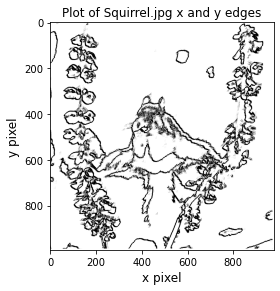

 
Date and time 2021-01-06 21:08:54.133997
Time since last check is 0:00:00.174511


In [13]:
# <!-- Student -->
#
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
imgMin = np.amin(img)
imgMax = np.amax(img)
print("Min intensity in image",imgMin,"max intensity",imgMax)
#
shiftR = 5
shiftC = 5
print("nRows",nRows,"nCols",nCols)
print("shiftR",shiftR,"shiftC",shiftC)
imgEdge = np.full((nRows, nCols), False)
imgEdge[0:nRows - shiftR, 0:nCols - shiftC] = \
   np.logical_or(np.logical_or(np.logical_and(imgThr[0:nRows - shiftR, 0:nCols - shiftC], 
                                              np.logical_not(imgThr[0:nRows - shiftR, shiftC:nCols])),   # horizontal left
                               np.logical_and(np.logical_not(imgThr[0:nRows - shiftR, 0:nCols - shiftC]),
                                              imgThr[0:nRows - shiftR, shiftC:nCols])),                  # horizontal right
                 np.logical_or(np.logical_and(np.logical_not(imgThr[0:nRows - shiftR, 0:nCols - shiftC]), 
                                              imgThr[shiftR:nRows, 0:nCols - shiftC]),                   # vertical bottom
                               np.logical_and(imgThr[0:nRows - shiftR, 0:nCols - shiftC], 
                                              np.logical_not(imgThr[shiftR:nRows, 0:nCols - shiftC]))))  # vertical top
imgEdge[0:nRows, 0] = False
imgEdge[0, 0:nCols] = False
imgEdge[0:nRows, nCols - shiftC - 1] = False
imgEdge[nRows - shiftR - 1, 0:nCols] = False
#
print(" ")
fig = plt.figure(figsize=(4, 8))
plt.title("Plot of " +  imFile + " x and y edges", fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)
plt.imshow(imgEdge, cmap = "Greys")
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))